<a href="https://colab.research.google.com/github/alexre24/Food-Sales-Predictions/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 1

####Alex Re

##Loading Data

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sales_df = pd.read_csv("/content/drive/MyDrive/Coding Dojo/02 Week 2: Manipulating and Understanding Data/sales_predictions.csv")
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Data Cleaning

In [5]:
sales_df.shape

(8523, 12)

In [6]:
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
sales_df.duplicated().any()

False

In [8]:
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
sales_df[sales_df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [10]:
weight_average = sales_df["Item_Weight"].mean()
sales_df["Item_Weight"].fillna(value = weight_average, inplace=True)
# I decided to fill the missing columns in "Item_Weight" with the average item weight because it is a numerical value, and less than half of the data points are missing.

In [11]:
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
sales_df.dropna(inplace=True)
sales_df.head()
#I decided to drop the missing data from "Outlet_Size" because over half of the data points were missing. 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [13]:
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


In [15]:
sales_df["Item_Type"].value_counts()

Fruits and Vegetables    883
Snack Foods              868
Household                649
Frozen Foods             615
Dairy                    496
Canned                   471
Baking Goods             463
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64

In [16]:
sales_df.replace(["LF"], ["Low Fat"], inplace=True)
sales_df.replace(["low fat"], ["Low Fat"], inplace=True)
sales_df.replace(["reg"], ["Regular"], inplace=True)
sales_df["Item_Fat_Content"].value_counts()

Low Fat    3955
Regular    2158
Name: Item_Fat_Content, dtype: int64

In [17]:
sales_df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
sales_df.min(numeric_only=True).round(2)

Item_Weight                     4.56
Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.96
dtype: float64

In [19]:
sales_df.max(numeric_only=True).round(2)

Item_Weight                     21.35
Item_Visibility                  0.33
Item_MRP                       266.89
Outlet_Establishment_Year     2009.00
Item_Outlet_Sales            13086.96
dtype: float64

In [20]:
sales_df.mean(numeric_only=True).round(2)

Item_Weight                    12.89
Item_Visibility                 0.06
Item_MRP                      141.26
Outlet_Establishment_Year    1995.79
Item_Outlet_Sales            2322.69
dtype: float64

##Exploratory Visuals

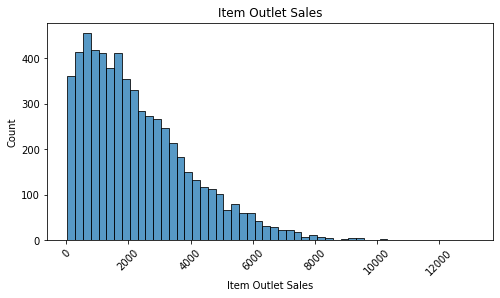

In [21]:
plt.figure(figsize = (8,4))
sns.histplot(data = sales_df, x = "Item_Outlet_Sales");
plt.xticks(rotation = 45);
plt.xlabel("Item Outlet Sales")
plt.ylabel("Count")
plt.title("Item Outlet Sales");

In [22]:
#This histogram shows the distribution of Item Outlet Sales. The data is skewed to the left. 

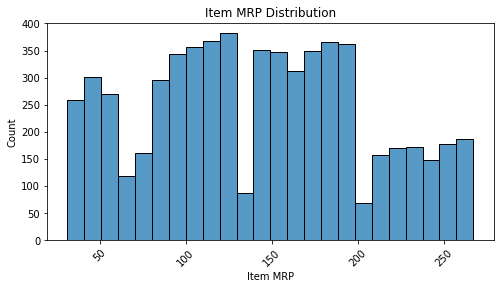

In [23]:
plt.figure(figsize = (8,4))
sns.histplot(data = sales_df, x = "Item_MRP");
plt.xticks(rotation = 45);
plt.xlabel("Item MRP")
plt.ylabel("Count")
plt.title("Item MRP Distribution");

In [24]:
#This histogram shows the distribution of Maximum Retail Price of items. 

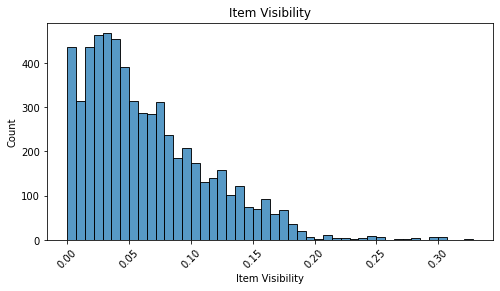

In [25]:
plt.figure(figsize = (8,4))
sns.histplot(data = sales_df, x = "Item_Visibility");
plt.xticks(rotation = 45);
plt.xlabel("Item Visibility")
plt.ylabel("Count")
plt.title("Item Visibility");

In [26]:
#This histogram shows the distribution of Item Visibility of products. It is skewed to the right. 

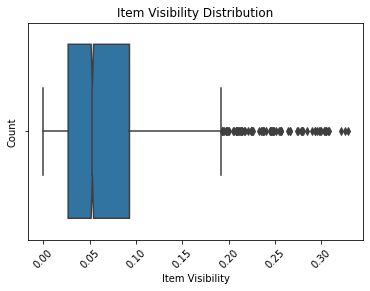

In [27]:
sns.boxplot(data = sales_df, x = "Item_Visibility", notch = True);
plt.xticks(rotation = 45);
plt.xlabel("Item Visibility")
plt.ylabel("Count")
plt.title("Item Visibility Distribution");

In [28]:
#This boxplot shows the Item Visibility as well. The median Item Visibility is 0.05.

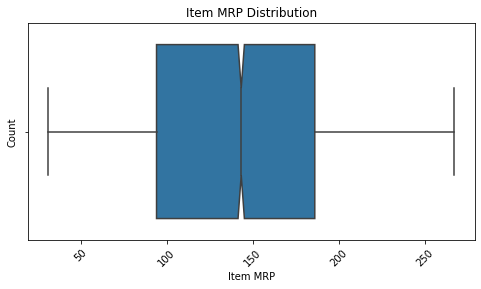

In [29]:
plt.figure(figsize = (8,4))
sns.boxplot(data = sales_df, x = "Item_MRP", notch = True);
plt.xticks(rotation = 45);
plt.xlabel("Item MRP")
plt.ylabel("Count")
plt.title("Item MRP Distribution");

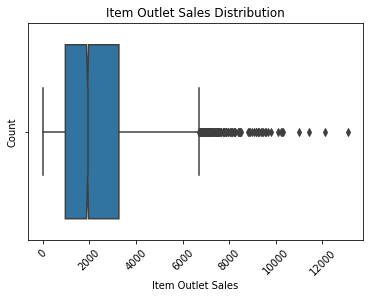

In [30]:
sns.boxplot(data = sales_df, x = "Item_Outlet_Sales", notch = True);
plt.xticks(rotation = 45);
plt.xlabel("Item Outlet Sales")
plt.ylabel("Count")
plt.title("Item Outlet Sales Distribution");

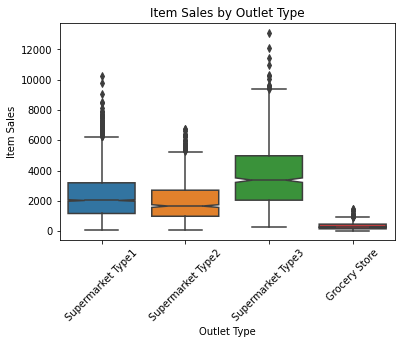

In [31]:
sns.boxplot(data = sales_df, x = "Outlet_Type", y = "Item_Outlet_Sales", notch = True);
plt.xticks(rotation = 45);
plt.xlabel("Outlet Type")
plt.ylabel("Item Sales")
plt.title("Item Sales by Outlet Type");

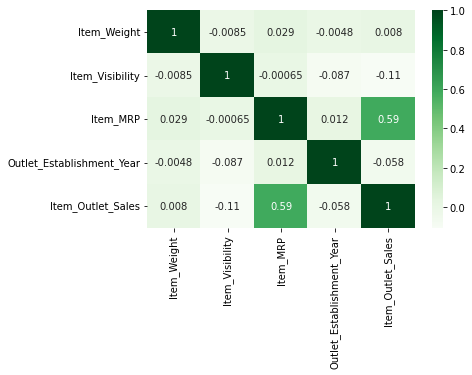

In [32]:
import seaborn as sns
sns.heatmap(data = sales_df.corr(), cmap = "Greens", annot = True);


##Explanatory Visuals

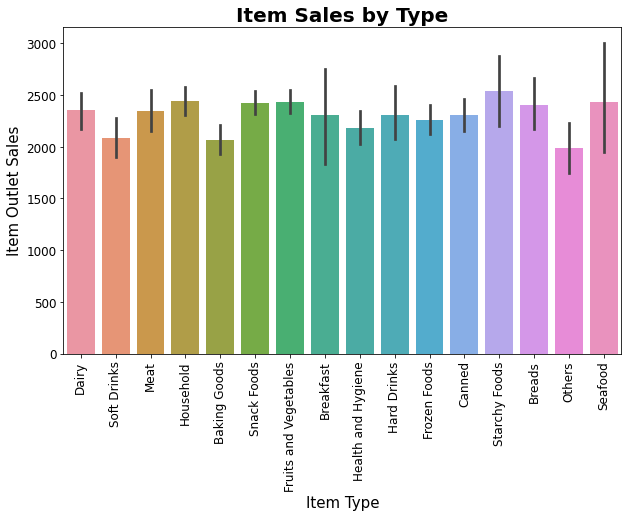

In [39]:
fig, ax = plt.subplots(figsize = (10, 6))

ax = sns.barplot(data = sales_df, x = "Item_Type", y = "Item_Outlet_Sales")
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_title("Item Sales by Type", fontsize = 20, fontweight = "bold")
ax.set_xlabel("Item Type", fontsize = 15)
ax.set_ylabel("Item Outlet Sales", fontsize = 15);
plt.savefig('Item Sales By Type.png', dpi = 300)

In [34]:
#Starchy foods, seafood, and dairy are some of the highest selling items, while soft drinks are one of the lowest selling items. 

In [35]:
mean_sales = sales_df.groupby("Outlet_Type")["Item_Outlet_Sales"].mean()
mean_sales

Outlet_Type
Grocery Store         340.329723
Supermarket Type1    2340.986430
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

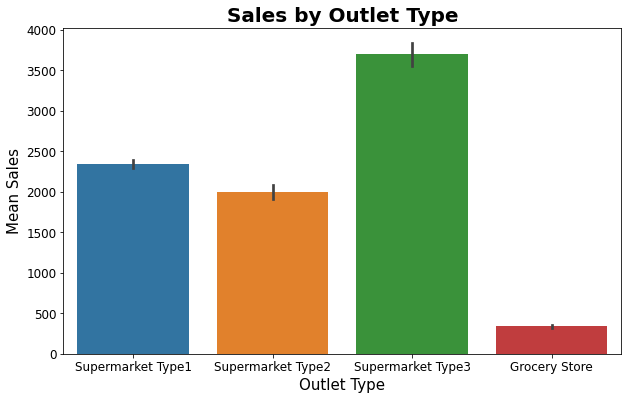

In [38]:
fig, ax = plt.subplots(figsize = (10, 6))

ax = sns.barplot(data = sales_df, x = "Outlet_Type", y = "Item_Outlet_Sales")
plt.xticks(rotation = 0 , fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_title("Sales by Outlet Type", fontsize = 20, fontweight = "bold")
ax.set_xlabel("Outlet Type", fontsize = 15)
ax.set_ylabel("Mean Sales", fontsize = 15);
plt.savefig('Sales by Outlet Type.png', dpi = 300)

In [37]:
#Supermarket Type 3 is, by far, generating the largest amount of profit. Grocery stores generate the least amount of profit. 